# Training Models

This is the summary of Chapter 4: Training Models from the Aurélien Géron's 2017. book called [Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (1st. ed.). O’Reilly Media, Inc.](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)

## Linear Regression

Machine learning type model that makes a prediction by computing a weighted sum of the input features, plus a constant called the *bias* term (also called the *intercept* term):

$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + + \theta_{n}x_{n}
$$

where:
* $\hat{y}$ is the predicted value;
* $n$ is the number of features;
* $x_{i}$ is the $i^{th}$ feature value;
* $\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_{0}$ and the rest of the feature weights.

or in vectorized form:

$$
\hat{y} = h_{\bf{\theta}}(\bf{x}) = \bf{\theta} \bf{x}
$$

where:
* $\bf{\theta}$ is the model's *parameter vector*, contating the bias term and the rest of the feature weights;
* $\bf{x}$ is the instance's *feature vector*, contating $x_{0}$ to $x_{n}$, with the $x_{0}$ always equal to 1;
* $h_{\theta}$ is the hypothesis function, parametrized with $\bf{\theta}$.

In order to train a Linear Regression model, the value of $\bf{\theta}$ has to be optimal such that minimizes the root mean square error (RMSE). In practice, it is simpler to minimize the mean square error (MSE).

The MSE of a Linear Regression hypothesis $h_{\theta}$ on a trining set $\bf{X}$ is defined with the following expression:

$$
J_{\theta}(X) = MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}(\theta^T X^{(i)} - y^{(i)})^2
$$

where:
* $h_{\theta}$ is the Linear Regression hypothesis and
* $\bf{X}$ is the training set X with $m$ input examples.

### Optimization 1: The Normal Equation

To find the value of $\theta$ that minimizes the given cost function $J_{\theta}(X)$, there is a *closed-form* solution, a mathematical equation that gives such values directly. This equation is called *Normal Equation* and is given with the following expression:

$$
\hat{\theta} = (X^T X)^{-1} X^T y
$$

where:
* $ \hat{\theta} $ is the value of $\theta$ that minimizes the cost function and
* $y$ is the vector of target values with shape (1, $m$).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plotData(X, y):
    plt.scatter(X, y, label='data')
    plt.xlabel('x1')
    plt.ylabel('y')
    plt.grid()
    
def normalEqn(X, y):
    m = X.shape[0] 
    X_bias = np.concatenate((np.ones((m, 1)), X), axis=1)
    theta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
    return theta

theta_0 = [4.21509616]
theta_1 = [2.77011339]
actual values: 4, 3


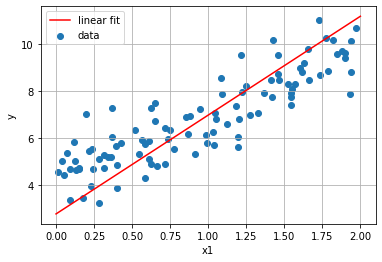

In [2]:
# generate artificial data with noise
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# visualize the data
plotData(X, y)

# calculate optimal values for theta
theta = normalEqn(X, y)
print(f'theta_0 = {theta[0]}\ntheta_1 = {theta[1]}')
print(f'actual values: 4, 3')

# predictions using optimal theta
x_new = np.array([0, 2]).reshape(-1, 1)
y_predict = np.c_[x_new, np.ones((x_new.shape[0], 1))] @ theta
plt.plot(x_new, y_predict, 'r-', label='linear fit')
plt.legend(loc='best')

plt.show()

Performing the linear regression using Scikit-Learn is done by using ```LinearRegression``` class, which is based on the ```scipy.linalg.lstsq()``` function. This function computes $\hat{\theta} = X^+ y$, where $X^+$ is the *pseudoinverse* of $X$. Pseudoinverse can be directly computed using ```np.linalg.pinv()``` function using a standard matrix factorization technique called *Singular Value Decomposition* (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U \Sigma V^T$. The pseudoinverse is computed as $X^+ = V \Sigma^+ U^T$; to compute $\Sigma^+$, the algorithm takes $\Sigma$ and sets to zero all values smaller that a threshold value, then replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix. 

This approach, using a pseudoinverse calculation, is much more computationaly efficient than computing the Normal Equation and it is better at handling edge cases. The Normal Equation is, however, used it he matrix $X^TX$ is singular, such as if $m \leq n$.

#### Computational Complexity

The Normal Equation computes the inverse of $X^T X$, which is an $(n + 1) \times (n + 1)$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $(O(n^{2.4})$ to $O(n^3)$, depending on the implementation. The SVD approach used by Scikit-Learn's ```LinearRegression``` is about $O(n)$. 

Normal Equation approach is extremely slow to solve when the number of features grows large but since its linear properties create $O(m)$ space complexity, it can handle large training sets efficiently. Also, once the Linear Regression model using the Normal Equation is trained, predictions are very fast: the computational complexity is linear with regards to both the number of instances and the number of features. 

### Optimization 2: Gradient Descent

When the number of features is large, or there are too many training instances to fit in memory *Gradient Descent* is a way to go.
It is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize the cost function.

[![3blue1brown Gradient Descent](https://img.youtube.com/vi/IHZwWFHWa-w/0.jpg)](https://www.youtube.com/watch?v=IHZwWFHWa-w)

To start with the gradient descent, parameters $\theta$ need to be initialized to some random values, and then imporoved iteratively one step at the time. The cost function will decrease with each step until the algorithm converges to a minimum. 

It is important to adjust *learning rate* hyperparameter: if the learning rate is too small, the algorithm will converge slowly, on the other hand, if the learning rate is too high, algorithm will possibly diverge, failing to find a good solution. 

For non-convex shaped functions, convergence to *global* minima is sometimes impossible. It will alway reach *local* optima. 

Fortunately, the MSE, used as a cost function for Linear Regression algorithm, is convex function, which means there is only a single minima, so by default there is no local, only global minimum value of the function. It is also a continuous function with a slope that never change abruptly - Lipshitz continuous. 

In order to Gradient Descent works optimally, all features should be on a similar scale. This will speed up convergence drastically. 

#### Batch Gradient Descent 

To implement Gradient Descent, the gradient of the cost function with regards to each parameter $\theta_{j}$ has to be computed:

$$
\frac{\partial}{\partial \theta_{j}}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^T x^{(i)} - y^{(i)})x_{j}^{(i)}
$$

The gradient vector contains all the partial derivatives of the cost function (one for each model parameter):

$$
\nabla_{\theta}MSE(\theta) = \begin{bmatrix}
                                \frac{\partial}{\partial \theta_{0}}MSE(\theta)\\
                                \frac{\partial}{\partial \theta_{1}}MSE(\theta)\\
                                \vdots\\
                                \frac{\partial}{\partial \theta_{n}}MSE(\theta)
                            \end{bmatrix}
$$

and in vectorized version it can be calculated using the following expression:

$$
\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T(X\theta - y)
$$

The Batch Gradient Descent algorithm involves calculations over the full training set $X$, for each Gradient Descent step, which ofcourse means it is extremely slow on very large training data set but unlike the Normal Equation or SVD decomposition, it scales well with the large number of features.

With each step, parameters $\theta$ are updated:

$$
\theta := \theta - \eta \nabla_{\theta}MSE(\theta)
$$

In [3]:
def gradientDescent(theta, X, y, eta, n_iterations):
    m, n = X.shape
    X_bias = np.c_[np.ones((m, 1)), X]
    history = np.zeros((n_iterations, n+1))
    
    for i in range(n_iterations):
        gradients = 2/m * X_bias.T @ (X_bias @ theta - y)
        theta = theta - eta * gradients
        history[i, :] = theta.ravel() 
        
    return theta, history

In [4]:
theta = np.random.randn(2, 1) 
eta = 0.1
n_iterations = 1000

theta, _ = gradientDescent(theta, X, y, eta, n_iterations)
print(f'theta_0 = {theta[0]}\ntheta_1 = {theta[1]}')
print(f'actual values: 4, 3')

theta_0 = [4.21509616]
theta_1 = [2.77011339]
actual values: 4, 3


Values for the theta are exactly what the Normal Equation found.

In this case, the $\eta$ hyperparameter was chosen to work very well with this data, even if there was small number of iterations, it would still converge. If the $\eta$ is too small, learning process will be slow, the algorithm will eventually reach the solution, but it will take some time. On the other hand, if the $\eta$ is too large, instead to converge, gradient descent will diverge. 

In order to find the best hyperparameter value, we could do it manually or by using ```GridSearchCV``` function by Scikit-Learn.

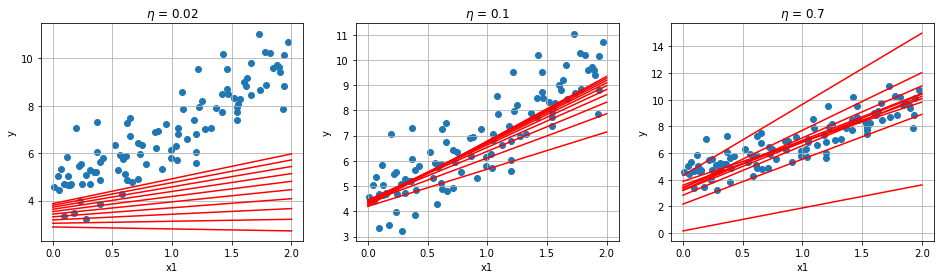

In [5]:
theta = np.random.randn(2, 1)
etas = [0.02, 0.1, 0.7]
n_iterations = 10
x_new = np.array([0, 2]).reshape(-1, 1)

plt.figure(figsize=(16, 4))
for i, eta in enumerate(etas):
    theta, history = gradientDescent(theta, X, y, eta, n_iterations)
    y_predict = np.c_[x_new, np.ones((x_new.shape[0], 1))] @ history.T
    plt.subplot(1,3,i+1)
    plotData(X, y)
    plt.plot(x_new, y_predict, 'r-')
    plt.title(f'$\eta$ = {eta}')
plt.show()

The *number of iterations* hyperparameter can be set to very large number and when the gradient vector becomes smaller than *tolerance* $\epsilon$ we can conclude that it is very close to minimum. Depending on how good we want our solution to be, Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but it may take a while: it can take up to $O(\epsilon^{-1})$ iterations to reach the optimum within a range of $\epsilon$ depending on the shape of the cost function.

#### Stohastic Gradient Descent 

The main problem of the Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every iteration, which makes it very slow when the training set is large. *Stohastic Gradient Descent* picks a single random instance in the training set at every step and computes the gradients based only on that single instance. It is a good fit for training models on large data sets since only a single instance needs to be in memory  at each iteration. 

Unlike the Batch Gradient Descent, Stohastic Gradient Descent due to its *stohastic* nature does not decrease with every iteration. The descent itself, when visualized in parameter space, looks something like random walk. For non-convex cost functions it is a huge benefit, since it can help algorithm to not stuck in local minima. On the other hand, randomness is a curse also since the algorithm can never settle at the minimum. One solution to this is to gradually reduce the learning rate. The initial step is very large, which allows the algorithm to make a quick progress and escape local minima, then step becomes gradually smaller, allowing the algorithm to settle at the global minimum. The function that determines the learning rate at each iteration is called the *learning schedule*. It has to be well optimized because if the learning rate is reduced too quickly, algorithm may stuck in a local minimum and if the learning rate is reduced too slowly, algorithm may jump around the minimum for a long time and end up with a suboptimal solution if the training process is halted too early.

In [6]:
def learningSchedule(t, t0, t1):
    return t0 / (t+t1)

def stohasticGradientDescent(theta, X, y, n_epochs, *args):
    if(isinstance(args[0], int)): t0 = args[0]
    if(isinstance(args[1], int)): t1 = args[1]
        
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    m, n = X_bias.shape
    
    #np.random.shuffle(X_bias)
    
    history = np.zeros((n_epochs, n))
    for epoch in range(n_epochs):
        history[epoch, :] = theta.ravel()
        for i in range(m):
            _x = X_bias[i:i+1, :]
            _y = y[i:i+1]
            gradients = 2 * _x.T @ (X_bias[i:i+1] @ theta - _y)
            eta = learningSchedule(epoch*m + i, t0, t1)
            theta = theta - eta * gradients
    return theta, history

In [7]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparams
theta = np.random.randn(2,1)
theta, history = stohasticGradientDescent(theta, X, y, n_epochs, t0, t1)
print(f'theta_0 = {theta[0]}\ntheta_1 = {theta[1]}')
print(f'actual values: 4, 3')

theta_0 = [4.22148439]
theta_1 = [2.77922225]
actual values: 4, 3


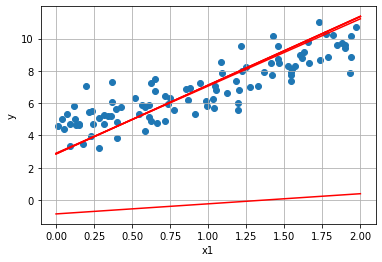

In [8]:
x_new = np.array([0, 2]).reshape(-1, 1)
y_predict = np.c_[x_new, np.ones((x_new.shape[0], 1))] @ history[:5, :].T

plotData(X, y)
plt.plot(x_new, y_predict, 'r-')
plt.show()

Linear Regression with SGD in Scikit-Learn can be used with ```SGDRegressor``` class, which defaults to optimizing the squared error cost function. It also uses default learning schedule, different from the previous one.

In [9]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
model.fit(X, y.ravel())

print(f'theta_0 = {model.intercept_}\ntheta_1 = {model.coef_}')
print(f'actual values: 4, 3')

theta_0 = [4.22176099]
theta_1 = [2.77742082]
actual values: 4, 3


#### Mini-batch Gradient Descent 

At each step, Mini-batch Gradient Descent computes the gradients on small random sets of instances called *mini-batches*, which puts it somewhere between Batch Gradient Descent (using the full data set) and Stohastic Gradient Descent (using a single instance). The main advantage of Mini-batch Gradient Descent over Stohastic Gradient descent is possibility of performance boost from hardware optimization of matrix operations, especially when using GPUs. 

By nature, it is much less random than Stohastic Gradient Descent, which allows it to converge faster when learning schedule is on point. 